### Tarea 7.7

Use $10$ puntos equidistantes para encontrar un polinomio interpolante de la función $f(x) = \tanh(x)$ entre $x = -10$ y $x = 10$. Compare el polinomio con la función obtenida. Explique.

In [175]:
import numpy as np
import matplotlib.pyplot as plt

#Generamos funcion y puntos equisdistantes
x =  np.linspace(-10,10,10)
f= np.tanh(x) 
puntos = np.array([(x[i],f[i])for i in range(10)])

In [177]:
def difer(puntos):
    
    n = len(puntos) - 1
    Fs = [np.zeros(n + 1)]
    for i in range(n + 1):
        Fs[0][i] = puntos[i][1]
    for i in range(1, n + 1):
        Fs.append(np.zeros(n + 1 - i))
        for j in range(1, i + 1):
            Fs[j][i-j] = (Fs[j-1][i-j+1] - Fs[j-1][i-j])/(puntos[i][0] - puntos[i-j][0])
    
    return [Fs[i][0] for i in range(n + 1)]


In [171]:
coef = difer(puntos)

In [108]:
def poly(x, coefs):
    return sum(coef[n]*np.prod([(x - puntos[i,0]) for i in range(n)]) for n in range(len(coefs)))

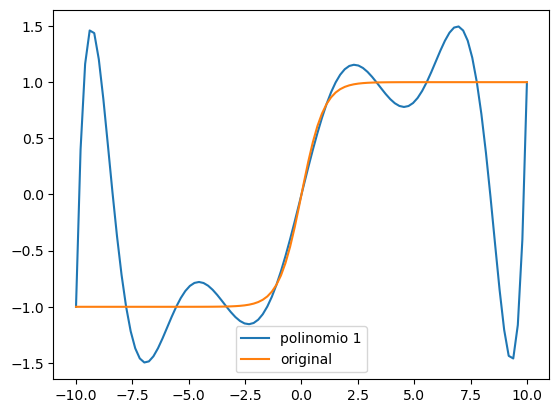

In [176]:
x=np.linspace(-10,10,100)

#Se genera la grafica
plt.plot(x, [poly(xi, coef) for xi in x], label= "polinomio 1")
plt.plot(x, np.tanh(x),label= "original" )
plt.legend()
plt.show()

Finalmente se observa que el polinomio tiene gran precision en un grado alrededor de -1 a 1.

# Calificación:  6.5

¿Por qué funciona tan mal el polinomio cerca de -10 o 10? (Es porque los polinomios de alto orden tienden a tener grandes oscilaciones. Esto también se puede ver a partir de la fórmula de error.)